<a href="https://colab.research.google.com/github/XeyaleVeliyeva/Cifar10/blob/main/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

augmented_data = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)


In [ ]:
from tensorflow.keras.layers import Dropout
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
model.fit(
    augmented_data.flow(X_train, y_train, batch_size=64),
    validation_data=(X_test, y_test),
    epochs=15
)

Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 39ms/step - accuracy: 0.2494 - loss: 1.9924 - val_accuracy: 0.4660 - val_loss: 1.4578
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.4450 - loss: 1.5187 - val_accuracy: 0.5440 - val_loss: 1.2401
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.5033 - loss: 1.3846 - val_accuracy: 0.5638 - val_loss: 1.2100
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 35ms/step - accuracy: 0.5459 - loss: 1.2863 - val_accuracy: 0.5888 - val_loss: 1.1396
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step - accuracy: 0.5753 - loss: 1.2122 - val_accuracy: 0.6467 - val_loss: 0.9957
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.5920 - loss: 1.1566 - val_accuracy: 0.6539 - val_loss: 1.0021
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 35ms/step - accuracy: 0.6104 - loss: 1.1177 - val_accuracy: 0.6742 - val_loss: 0.9206
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.6185 - loss: 1.0899 - val_accurac

In [ ]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7097 - loss: 0.8580


[0.8570942282676697, 0.7110000252723694]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


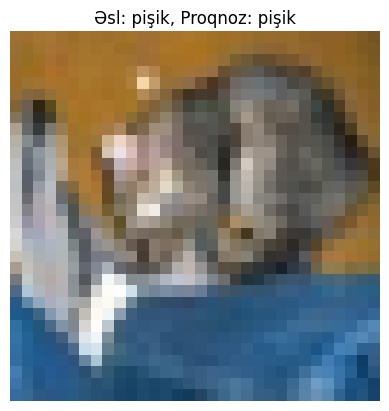

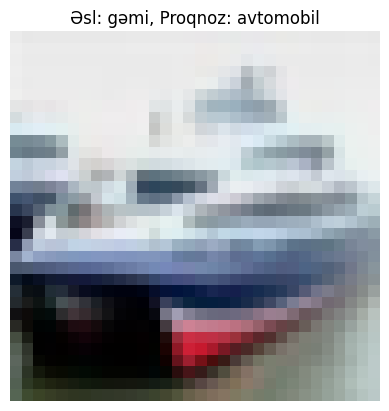

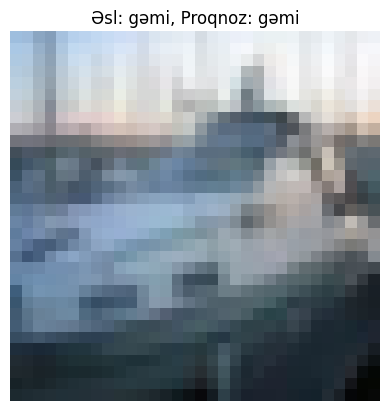

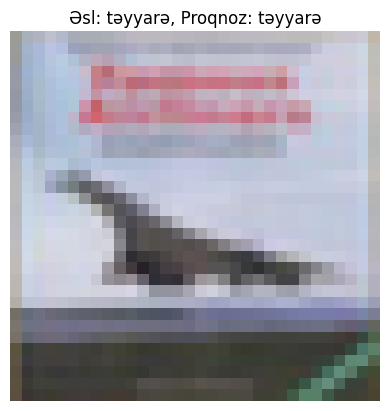

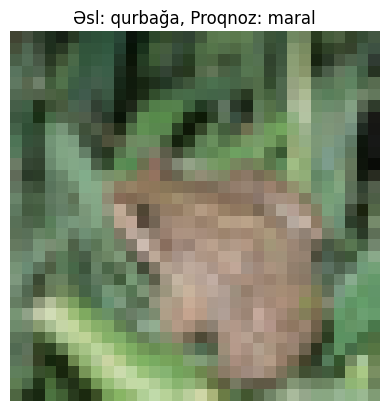

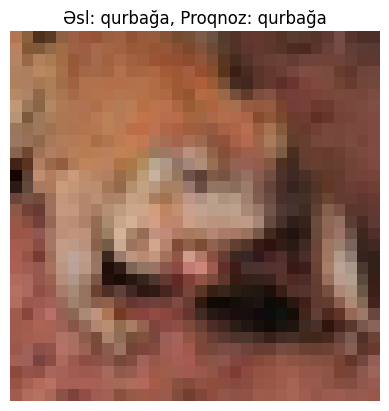

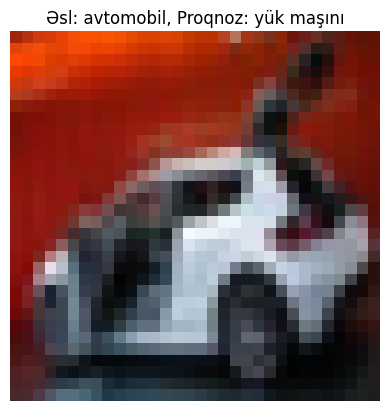

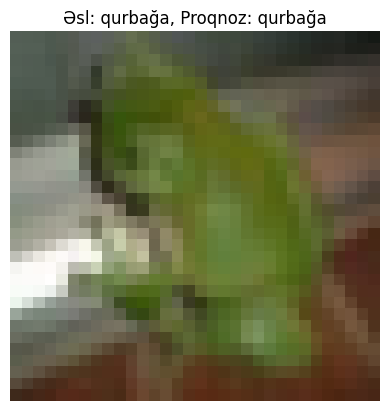

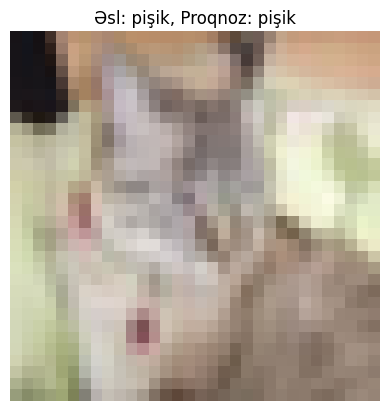

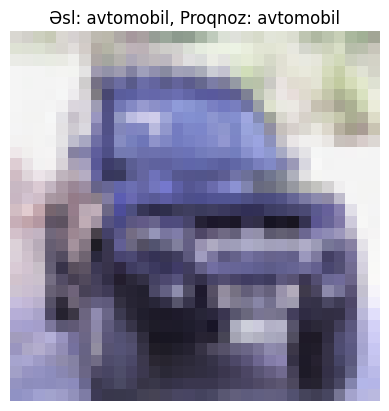

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
class_names = ['təyyarə', 'avtomobil', 'quş', 'pişik', 'maral',
               'it', 'qurbağa', 'at', 'gəmi', 'yük maşını']

predictions = model.predict(X_test)

for i in range(10):
    plt.imshow(X_test[i])
    true_label = y_test[i][0]
    predicted_label = np.argmax(predictions[i])
    plt.title(f"Əsl: {class_names[true_label]}, Proqnoz: {class_names[predicted_label]}")
    plt.axis('off')
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


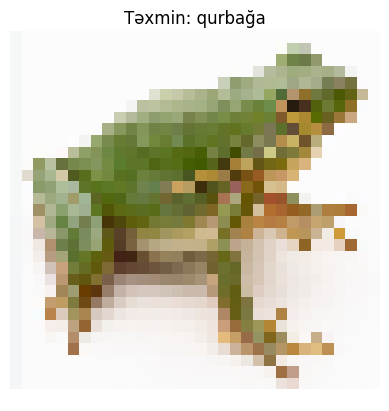

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import cv2
img = cv2.imread("/content/frog.PNG")
img = cv2.resize(img, (32, 32))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img = img / 255.0

img = img.reshape(1, 32, 32, 3)

prediction = model.predict(img)
predicted_class = np.argmax(prediction)

class_names = ['təyyarə', 'avtomobil', 'quş', 'pişik', 'maral',
               'it', 'qurbağa', 'at', 'gəmi', 'yük maşını']

plt.imshow(img.reshape(32, 32, 3))
plt.title(f"Təxmin: {class_names[predicted_class]}")
plt.axis("off")
plt.show()